In [2]:
import pandas as pd
import numpy as np

# Import Plotting Libararies
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data Preprocessing Libraries 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning Models
from sklearn import svm  
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

# Model Evaluation Libraries
from sklearn.metrics import classification_report, confusion_matrix
import urduhack

In [3]:
df= pd.read_csv(r'D:\Study\PHD\2nd Semster\independent Study 2\Fake news detection\data.csv')

In [4]:
df.head()

,text,fake
0,عمران خان نے وزارت عظمی کا عہدہ سنبھالنے کے بع...,yes
1,پاکستان اسٹاک ایکسچینج پی ایس ایکس میں کاروبار...,yes
2,حکومت نے نئی سال کی آمد پر موبائل صارفین کے لی...,yes
3,ترکی میں روس کے ٹماٹروں کی بڑھتی ہو مانگ کے بع...,yes
4,ریاض اردو پوائنٹ اخبارتازہ ترین 18 نومبر2018ء ...,yes


In [5]:
from typing import FrozenSet

# Urdu Language Stop words list
STOP_WORDS: FrozenSet[str] = frozenset("""
 آ آئی آئیں آئے آتا آتی آتے آس آمدید آنا آنسہ آنی آنے آپ آگے آہ آہا آیا اب ابھی ابے
 ارے اس اسکا اسکی اسکے اسی اسے اف افوہ البتہ الف ان اندر انکا انکی انکے انہوں انہی انہیں اوئے اور اوپر
 اوہو اپ اپنا اپنوں اپنی اپنے اپنےآپ اکثر اگر اگرچہ اہاہا ایسا ایسی ایسے ایک بائیں بار بارے بالکل باوجود باہر
 بج بجے بخیر بشرطیکہ بعد بعض بغیر بلکہ بن بنا بناؤ بند بڑی بھر بھریں بھی بہت بہتر تاکہ تاہم تب تجھ
 تجھی تجھے ترا تری تلک تم تمام تمہارا تمہاروں تمہاری تمہارے تمہیں تو تک تھا تھی تھیں تھے تیرا تیری تیرے
 جا جاؤ جائیں جائے جاتا جاتی جاتے جانی جانے جب جبکہ جدھر جس جسے جن جناب جنہوں جنہیں جو جہاں جی جیسا
 جیسوں جیسی جیسے حالانکہ حالاں حصہ حضرت خاطر خالی خواہ خوب خود دائیں درمیان دریں دو دوران دوسرا دوسروں دوسری دوں
 دکھائیں دی دیئے دیا دیتا دیتی دیتے دیر دینا دینی دینے دیکھو دیں دیے دے ذریعے رکھا رکھتا رکھتی رکھتے رکھنا رکھنی
 رکھنے رکھو رکھی رکھے رہ رہا رہتا رہتی رہتے رہنا رہنی رہنے رہو رہی رہیں رہے ساتھ سامنے ساڑھے سب سبھی
 سراسر سمیت سوا سوائے سکا سکتا سکتے سہ سہی سی سے شاید شکریہ صاحب صاحبہ صرف ضرور طرح طرف طور علاوہ عین
 فقط فلاں فی قبل قطا لئے لائی لائے لاتا لاتی لاتے لانا لانی لانے لایا لو لوجی لوگوں لگ لگا لگتا
 لگتی لگی لگیں لگے لہذا لی لیا لیتا لیتی لیتے لیکن لیں لیے لے ماسوا مت مجھ مجھی مجھے محترم محترمہ محض
 مرا مرحبا مری مرے مزید مس مسز مسٹر مطابق مل مکرمی مگر مگھر مہربانی میرا میروں میری میرے میں نا نزدیک
 نما نہ نہیں نیز نیچے نے و وار واسطے واقعی والا والوں والی والے واہ وجہ ورنہ وغیرہ ولے وگرنہ وہ وہاں
 وہی وہیں ویسا ویسے ویں پاس پایا پر پس پلیز پون پونی پونے پھر پہ پہلا پہلی پہلے پیر پیچھے چاہئے
 چاہتے چاہیئے چاہے چلا چلو چلیں چلے چناچہ چند چونکہ چکی چکیں چکے ڈالنا ڈالنی ڈالنے ڈالے کئے کا کاش کب کبھی
 کدھر کر کرتا کرتی کرتے کرم کرنا کرنے کرو کریں کرے کس کسی کسے کم کن کنہیں کو کوئی کون کونسا
 کونسے کچھ کہ کہا کہاں کہہ کہی کہیں کہے کی کیا کیسا کیسے کیونکر کیونکہ کیوں کیے کے گئی گئے گا گنا
 گو گویا گی گیا ہائیں ہائے ہاں ہر ہرچند ہرگز ہم ہمارا ہماری ہمارے ہمی ہمیں ہو ہوئی ہوئیں ہوئے ہوا
 ہوبہو ہوتا ہوتی ہوتیں ہوتے ہونا ہونگے ہونی ہونے ہوں ہی ہیلو ہیں ہے یا یات یعنی یک یہ یہاں یہی یہیں
""".split())


def remove_stopwords(text: str):
    return " ".join(word for word in text.split() if word not in STOP_WORDS)


In [6]:
len(STOP_WORDS)

430

In [7]:
from urduhack.models.lemmatizer import lemmatizer
def lemitizeStr(str):
    lemme_str = ""
    temp = lemmatizer.lemma_lookup(str)
    for t in temp:
        lemme_str += t[0] + " "
    
    return lemme_str

In [120]:
df['stopwordsremoval'] =  df['text'].apply(remove_stopwords)
df['lemmatized_text'] = df['stopwordsremoval'].apply(lemitizeStr)

In [8]:
le = LabelEncoder()
le.fit(df['fake'])
df['encoded_fake'] = le.transform(df['fake'])

In [9]:
df.head()

,text,fake,encoded_fake
0,عمران خان نے وزارت عظمی کا عہدہ سنبھالنے کے بع...,yes,1
1,پاکستان اسٹاک ایکسچینج پی ایس ایکس میں کاروبار...,yes,1
2,حکومت نے نئی سال کی آمد پر موبائل صارفین کے لی...,yes,1
3,ترکی میں روس کے ٹماٹروں کی بڑھتی ہو مانگ کے بع...,yes,1
4,ریاض اردو پوائنٹ اخبارتازہ ترین 18 نومبر2018ء ...,yes,1


In [126]:
print(df.text[0])
print(df.stopwordsremoval[0])
print(df.lemmatized_text[0])

عمران خان نے وزارت عظمی کا عہدہ سنبھالنے کے بعد سعودی عرب قرضے مانگنے سعودی عرب کے دارالحکومت ریاض روانہ ہو گئے اس سرکاری دورے میں سعودی عرب کی حکومت سے پاکستان کو معاشی بحران سے نکالنے کی درخواست کریں گے اس بحران سے نمٹنے کے لیے حکومت پاکستان ایک سال کے لیے 20 ارب ڈالر مالی اداد دینے کی درخواست کرے گی جس کی سر برایہ خود وزیر اعظم پاکستان عمران خان کر رہے ہیں دفتر خارجہ کی جانب سے منگل کی شب جاری ہونے والے اعلامیے میں بتایا گیا ہے کہ سعودی حکام نے فیصلہ کیا ہے کہ وہ وزیر اعظم عمران خان کی درخواست پر 10 ارب ڈالر بطور مالہ امداد دینے پر اتفاق کیا ہے عمران خان سعودی عرب میں سرمایہ کاری کے حوالے سے کشکول لیے مالی معاونت کی غرض سے ریاض میں موجود ہیں عمران خان کو خود تو اپنی عزت کا احساس نہیں مگر انھیں غیور پاکستانی قوم کی غیرت کا بھی زرا خیال نہ آیا اور سوچے سمجھے بغیر وہ سعودی عرب روانہ ہو گئے جس پر سعودی حکام کو ترس آگیا اور انھوں نے پاکستان کو نہ صرف ایک سال کے لیے 10 ارب ڈالر دینے کا اعلان کیا بلکہ 5 سال تک مؤخر ادائیگیوں پر تقریبا 15 ارب ڈالر مالیت تک کا تیل دینے پر بھی رضامند ہو گیا ہ

In [10]:
import spacy
def tokenizer(str):
    nlp = spacy.blank('ur')
    doc = nlp.tokenizer(str)
    return [i.text for i in doc]
df["tokens"] = df["text"].apply(tokenizer)

In [11]:
df.head()

,text,fake,encoded_fake,tokens
0,عمران خان نے وزارت عظمی کا عہدہ سنبھالنے کے بع...,yes,1,"[عمران, خان, نے, وزارت, عظمی, کا, عہدہ, سنبھال..."
1,پاکستان اسٹاک ایکسچینج پی ایس ایکس میں کاروبار...,yes,1,"[پاکستان, اسٹاک, ایکسچینج, پی, ایس, ایکس, میں,..."
2,حکومت نے نئی سال کی آمد پر موبائل صارفین کے لی...,yes,1,"[حکومت, نے, نئی, سال, کی, آمد, پر, موبائل, صار..."
3,ترکی میں روس کے ٹماٹروں کی بڑھتی ہو مانگ کے بع...,yes,1,"[ترکی, میں, روس, کے, ٹماٹروں, کی, بڑھتی, ہو, م..."
4,ریاض اردو پوائنٹ اخبارتازہ ترین 18 نومبر2018ء ...,yes,1,"[ریاض, اردو, پوائنٹ, اخبارتازہ, ترین, 18, نومب..."


In [12]:
import gensim

model_word2vec = gensim.models.Word2Vec(sentences=df["tokens"], vector_size=128, window=5, workers=10, min_count = 1)

C:\Users\hp\anaconda3\envs\tensorflow\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [85]:
model_word2vec.wv.most_similar("مرد")

[('دور', 0.9996468424797058),
 ('تعلق', 0.9996218681335449),
 ('کافی', 0.9996209144592285),
 ('ہاتھ', 0.9996162056922913),
 ('مدد', 0.9996086359024048),
 ('بڑے', 0.9996070265769958),
 ('زندگی', 0.999606728553772),
 ('جان', 0.9996060729026794),
 ('جگہ', 0.9995936751365662),
 ('واضح', 0.9995933175086975)]

In [86]:
model_word2vec.wv.most_similar("خوفناک")

[('مخصوص', 0.9947750568389893),
 ('شمسی', 0.9945929050445557),
 ('صحت', 0.9945802688598633),
 ('گھنٹے', 0.9945588111877441),
 ('بہن', 0.9945472478866577),
 ('حسن', 0.994531512260437),
 ('سورج', 0.9945124983787537),
 ('سن', 0.994508683681488),
 ('پائے', 0.9945082068443298),
 ('انٹرویو', 0.9945059418678284)]

In [13]:
VOCAB_SIZE = len(model_word2vec.wv.key_to_index)
DIMENSIONS = 128
MAX_LEN = max([len(x) for x in df["tokens"]])

In [14]:
VOCAB_SIZE, DIMENSIONS, MAX_LEN

(19983, 128, 2198)

In [15]:
from keras.preprocessing.text import Tokenizer
token = Tokenizer()
token.fit_on_texts(df["tokens"])
encoded = token.texts_to_sequences(df["tokens"])

In [16]:
words2vec_matrix = np.zeros((VOCAB_SIZE+1,DIMENSIONS))
for word, index in token.word_index.items():
    try:
        words2vec_matrix[index] = model_word2vec.wv[word]
    except:
        print(index, word)

391 getty
436 image
949 images
1255 g
2638 afp
3426 edward
3427 burynsky
4058 epa
4396 s8
4474 usd
4573 zte
5177 july
5953 24dcp
5978 world
5997 aamir
6051 schumer
7030 25dcp
7068 kids
7184 imagesاس
7221 afpپاکستان
7262 afpgetty
7312 imagesسعودی
7363 wednesday
7364 june
7388 may
7500 imagesتصویر
7826 ccr5نامی
8381 فلمiruvar
8708 t20
8709 bcci
8814 asus
8815 rogنامی
8817 ہےasus
8818 rog
8819 amoled
8820 modeہے
8821 ui
8825 mah
8873 کوراquora
8994 ہیںپیجرزpagers
9049 primitive
9050 survival
9051 tool
9058 dudi
9059 perfectاس
9147 growing
9148 drag
9219 verified
9223 not
9415 build
9420 کریںwindow
9421 scaletransition
9422 scaleanimator
9426 intelligence
9539 intel
9540 realsense
9541 camera
9571 ii96400کی
9873 فلمkit
9874 kittredge
9875 girlان
9882 planسے
9884 spy
9887 meets
9891 سیریزone
9902 manny
9903 delgado
9915 beasts
9916 southern
9917 wildسے
9964 مجموعہmrs
9966 forgiving
9981 piece
9982 house
9989 diary
9990 diva
9992 modern
9993 experiments
10003 liaquats
10012 nothing
10018 mah

In [17]:
import tensorflow as tf
train_vectors = tf.keras.preprocessing.sequence.pad_sequences(encoded,padding='post',dtype=int)


In [18]:
train_label = df.encoded_fake

In [19]:
type(train_label[0])

numpy.int32

In [20]:
(train_sentences,test_sentences, train_tags, test_tags) = train_test_split(train_vectors, train_label, test_size=0.2, shuffle = True)

In [21]:
train_sentences

array([[12361,  1774,  2036, ...,     0,     0,     0],
       [ 2594,  2478,  1040, ...,     0,     0,     0],
       [  174,   149,   509, ...,     0,     0,     0],
       ...,
       [ 5912,     1,    34, ...,     0,     0,     0],
       [   26,     1,   508, ...,     0,     0,     0],
       [  174,   149,     9, ...,     0,     0,     0]])

In [22]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
from tensorflow.keras.optimizers import Adam, Optimizer, SGD
import tensorflow.keras.initializers as Init
from tensorflow.keras import regularizers


In [23]:
model = Models.Sequential()

model.add(Layers.Embedding(VOCAB_SIZE+1,DIMENSIONS,
                           embeddings_initializer = Init.Constant(words2vec_matrix),
                           input_length=MAX_LEN, trainable=False ))

model.add(Layers.Conv1D(512, 5, activation="relu"))
model.add(Layers.MaxPooling1D(5))

model.add(Layers.Conv1D(256, 5, activation="relu"))
model.add(Layers.MaxPooling1D(5))

model.add(Layers.Conv1D(128, 5, activation="relu"))
model.add(Layers.Dropout(0.3))
model.add(Layers.MaxPooling1D(3))

model.add(Layers.Conv1D(64, 3, activation="relu"))
model.add(Layers.Dropout(0.3))
model.add(Layers.MaxPooling1D(3))

model.add(Layers.Conv1D(32, 3, activation="relu"))
model.add(Layers.Dropout(0.3))

model.add(Layers.Flatten())

model.add(Layers.Dense(32, activation='relu', kernel_regularizer = regularizers.l2(1e-4)))
model.add(Layers.Dropout(0.6))

model.add(Layers.Dense(1,activation='sigmoid'))

model.summary()

model.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2198, 128)         2557952   
_________________________________________________________________
conv1d (Conv1D)              (None, 2194, 512)         328192    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 438, 512)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 434, 256)          655616    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 86, 256)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 82, 128)           163968    
_________________________________________________________________
dropout (Dropout)            (None, 82, 128)           0

In [24]:
CONV_NET = model.fit( train_sentences, train_tags, epochs=20, validation_split=0.20 )

Epoch 1/20
18/18 [==============================] - 32s 2s/step - loss: 0.7423 - accuracy: 0.5295 - val_loss: 0.6760 - val_accuracy: 0.5347
Epoch 2/20
18/18 [==============================] - 31s 2s/step - loss: 0.6892 - accuracy: 0.5538 - val_loss: 0.6860 - val_accuracy: 0.5417
Epoch 3/20
18/18 [==============================] - 32s 2s/step - loss: 0.6865 - accuracy: 0.5608 - val_loss: 0.6811 - val_accuracy: 0.5417
Epoch 4/20
18/18 [==============================] - 33s 2s/step - loss: 0.6873 - accuracy: 0.5521 - val_loss: 0.6802 - val_accuracy: 0.5417
Epoch 5/20
18/18 [==============================] - 31s 2s/step - loss: 0.6809 - accuracy: 0.5677 - val_loss: 0.6819 - val_accuracy: 0.5417
Epoch 6/20
18/18 [==============================] - 31s 2s/step - loss: 0.6781 - accuracy: 0.5573 - val_loss: 0.6823 - val_accuracy: 0.5417
Epoch 7/20
18/18 [==============================] - 34s 2s/step - loss: 0.6800 - accuracy: 0.5677 - val_loss: 0.6761 - val_accuracy: 0.5417
Epoch 8/20
18/18 [==

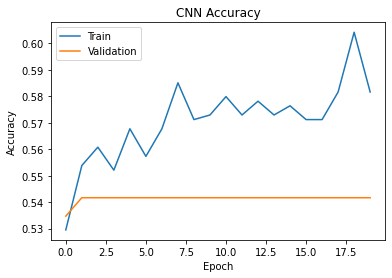

In [25]:
plt.plot(CONV_NET.history['accuracy'])
plt.plot(CONV_NET.history['val_accuracy'])
plt.title('CNN Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [26]:
print(classification_report(model.predict(test_sentences).round(), test_tags))

              precision    recall  f1-score   support

         0.0       0.89      0.48      0.63       163
         1.0       0.08      0.41      0.13        17

    accuracy                           0.48       180
   macro avg       0.48      0.45      0.38       180
weighted avg       0.81      0.48      0.58       180



In [27]:
lstm = Models.Sequential()

lstm.add(Layers.Embedding(VOCAB_SIZE+1,DIMENSIONS,
                          embeddings_initializer = Init.Constant(words2vec_matrix),
                          input_length=MAX_LEN, trainable=False ))

lstm.add(Layers.Bidirectional(Layers.LSTM(256, activation='tanh')))

lstm.add(Layers.Dense(128, activation='tanh'))
lstm.add(Layers.Dropout(0.3))

lstm.add(Layers.Dense(64, activation='tanh'))
lstm.add(Layers.Dropout(0.3))

lstm.add(Layers.Dense(1, activation='sigmoid'))

lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 2198, 128)         2557952   
_________________________________________________________________
bidirectional (Bidirectional (None, 512)               788480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [32]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
 

lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
es_callback = EarlyStopping(monitor='val_loss', patience=3) 
LSTM_NET = lstm.fit(train_sentences, train_tags, epochs=10, validation_split=0.2, callbacks=[es_callback], shuffle=False)

Epoch 1/10


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x000001591797A9D0>
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\envs\tensorflow\lib\weakref.py", line 346, in remove
    self = selfref()
KeyboardInterrupt: 


 2/18 [==>...........................] - ETA: 8:18 - loss: 0.7160 - accuracy: 0.5000

KeyboardInterrupt: 

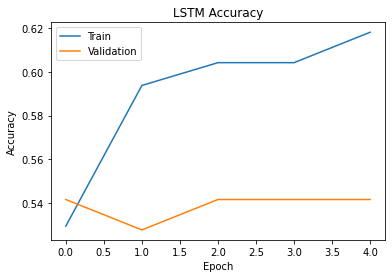

In [29]:
plt.plot(LSTM_NET.history['accuracy'])
plt.plot(LSTM_NET.history['val_accuracy'])
plt.title('LSTM Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [109]:
print(classification_report(lstm.predict(test_sentences).round(), test_tags))

              precision    recall  f1-score   support

         0.0       0.79      0.59      0.68       130
         1.0       0.35      0.58      0.44        50

    accuracy                           0.59       180
   macro avg       0.57      0.59      0.56       180
weighted avg       0.67      0.59      0.61       180



In [30]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_pred_cnn = model.predict(test_sentences).round()
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(test_tags, y_pred_cnn)

y_pred_lstm = lstm.predict(test_sentences).round() 
fpr_lstm, tpr_lstm, thresholds_lstm = roc_curve(test_tags, y_pred_lstm)
auc_cnn = auc(fpr_cnn, tpr_cnn)
auc_lstm = auc(fpr_lstm, tpr_lstm)

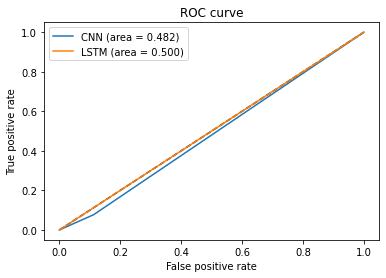

In [33]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_cnn, tpr_cnn, label='CNN (area = {:.3f})'.format(auc_cnn))
plt.plot(fpr_lstm, tpr_lstm, label='LSTM (area = {:.3f})'.format(auc_lstm))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()